In [1]:
import numpy as np
import matplotlib.pyplot as plt
import enum

#0: Neg          1: Center         2: Positive

def trapezoidal(a,x):
    if a[0] <= x and x <= a[1]: 
        return 1 if a[0] == a[1] else (x - a[0])/(a[1] - a[0])
    elif a[1] < x and x < a[2]: 
        return 1
    elif a[2] <= x and x <= a[3]:
        return 1 if a[2] == a[3] else (a[3] - x)/(a[3] - a[2])
    else: return 0

def triagular(a,x):
    if a[0] <= x and x <= a[1]:
        return 1 if a[0] == a[1] else (x - a[0])/(a[1] - a[0])
    elif a[1] < x and x <= a[2]:
        return (a[2] - x)/(a[2] - a[1])
    else:
        return 0

def _triagular(a,y):
    if y == 0: return [0,1]
    return [y *(a[1] - a[0]) + a[0], a[2] - y*(a[2] - a[1])]

def _trapezoidal(a,y):
    if y == 0: return [0,1]
    return [y *(a[1] - a[0]) + a[0], a[3] - y*(a[3] - a[2])]

def fuzzySet(a, x):
    return [trapezoidal(a[0:4],x), triagular(a[4:7],x), trapezoidal(a[7:11],x)]
        
def output(a,v):
    burnv = fuzzySet(a[0:],v[0])
    burnw = fuzzySet(a[11:],v[1])
    burn = np.zeros((3,3))
    r1=a[22:25]
    r2=a[25:28]
    ruleT1 = np.array([[r1[0],r1[0],r1[0]],[r1[1],r1[1],r1[1]],[r1[2],r1[2],r1[2]]])
    ruleT2 = np.array([r2,r2,r2])
    for i in range(0,3):
        for j in range(0,3):
            burn[i][j] = burnv[i] * burnw[j]
    sumburn = np.sum(burn,axis=None)
    #print("sumburn",sumburn)
    if sumburn == 0: 
        print("sai roi dm", a[0],a[1])
    burn = burn / sumburn if sumburn != 0 else 0
    TT1 = np.sum(burn*ruleT1)
    TT2 = np.sum(burn*ruleT2)
    return [TT1, TT2]

#print(output([-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-1000,0,1000,-1000,0,1000],[0,500]))
#output([0,1,2,3,4,5,6,7,8,9,10], [0, 0])
#def fitness(agent):
a = [-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-1000,0,1000,-1000,0,1000]

for i in range(-7,7) :
    for j in range(-7,7):
        print(i," ",j," === ",output(a,[i,j]))

-7   -7  ===  [-1000.0, -1000.0]
-7   -6  ===  [-1000.0, -1000.0]
-7   -5  ===  [-1000.0, -1000.0]
-7   -4  ===  [-1000.0000000000001, -798.7551867219918]
-7   -3  ===  [-1000.0, -594.9895615866388]
-7   -2  ===  [-999.9999999999999, -388.65546218487395]
-7   -1  ===  [-1000.0, -179.70401691331924]
-7   0  ===  [-1000.0, 0.0]
-7   1  ===  [-1000.0, 179.70401691331924]
-7   2  ===  [-999.9999999999999, 388.65546218487395]
-7   3  ===  [-1000.0, 594.9895615866388]
-7   4  ===  [-1000.0000000000001, 798.7551867219918]
-7   5  ===  [-1000.0, 1000.0]
-7   6  ===  [-1000.0, 1000.0]
-6   -7  ===  [-1000.0, -1000.0]
-6   -6  ===  [-1000.0, -1000.0]
-6   -5  ===  [-1000.0, -1000.0]
-6   -4  ===  [-1000.0000000000001, -798.7551867219918]
-6   -3  ===  [-1000.0, -594.9895615866388]
-6   -2  ===  [-999.9999999999999, -388.65546218487395]
-6   -1  ===  [-1000.0, -179.70401691331924]
-6   0  ===  [-1000.0, 0.0]
-6   1  ===  [-1000.0, 179.70401691331924]
-6   2  ===  [-999.9999999999999, 388.65546218

0.0007266191155852345


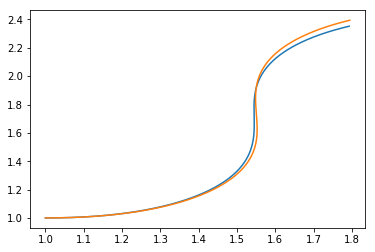

In [2]:
from numpy.linalg import inv

step = 0.01
ttime = 10

M = np.array([[0.3749, -0.0202],[-0.0202, 0.3739]])

D = np.array([[10,0],[0,10]])

def desireV(t):
    return np.array([0.2*(1-np.exp(-t)), 0.4*np.sin(0.5*t)])
    #return np.array([0.2, 6])

def fitness(a, draw = False, pl = plt):
    v = np.array([0.0,0.0])
    q = np.array([1.0,1.0,0.0])
    qd = np.array([1.0,1.0,0.0])
    qxs = []
    qys = []
    qxs2 = []
    qys2 = []
    error = 0.0
    for t in np.arange(0,ttime,step):
        vd = desireV(t)
        ev = (vd - v)*25
        Tou = output(a,ev)
        #print(ev,"   ",Tou)
        Cqq = np.array([[0,0.135*v[1]],[-0.135*v[1],0]])  
        deltav  = (Tou - D.dot(v.transpose())).dot(inv((M + Cqq+D)))
        deltav = deltav * step 
        v = v + np.array(deltav)
        deltaq = np.array([[np.cos(q[2]),0],[np.sin(q[2]),0], [0,1]]).dot(v.transpose())
        q = q + deltaq*step
        q[2] = q[2] % (2*np.pi)
        deltaqd = np.array([[np.cos(qd[2]),0],[np.sin(qd[2]),0], [0,1]]).dot(vd.transpose())
        qd = qd + deltaqd*step
        qd[2] = qd[2] % (2*np.pi)
        error+= np.sum((q[0:2]-qd[0:2])**2)
        if draw:
            qxs.append(q[0])
            qys.append(q[1])
            qxs2.append(qd[0])
            qys2.append(qd[1])   
    if draw:
        pl.plot(qxs,qys)
        pl.plot(qxs2,qys2)

    #print(q,qd)
    error=np.sqrt(error) / (ttime/step)
    error = np.sqrt(np.sum(error**2))
    #if q[0] ==1.0 and q[1]==1.0: return 100
    return np.abs(error)

a = [-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-5000,-5000,-5,-0.15,-5,0,5,0.15,5,5000,5000,-1000,0,1000,-1000,0,1000]
print(fitness(a,True))



Init: Fit =  0.0005215652812521338
Gen 0 : Fit =  0.0004020350719057517


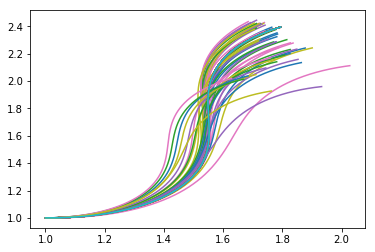

Gen 1 : Fit =  0.00036868028122213214


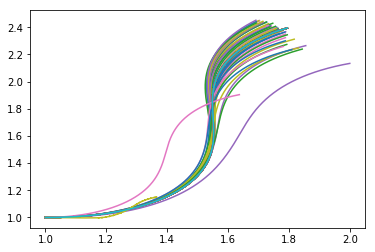

Gen 2 : Fit =  0.00033457512892181825


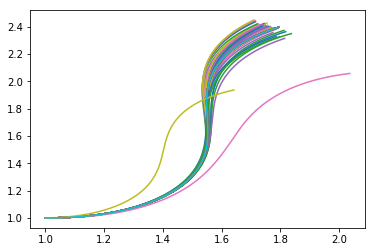

Gen 3 : Fit =  0.0001981026732502195


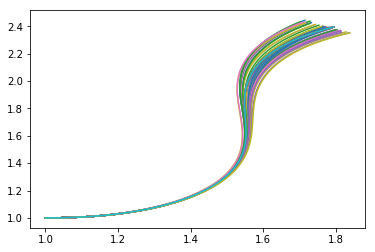

Gen 4 : Fit =  0.0001981026732502195


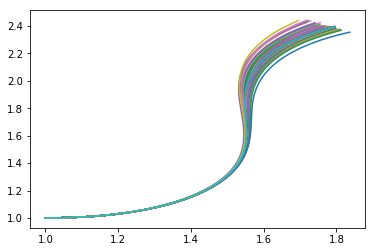

Gen 5 : Fit =  0.000143781456059836


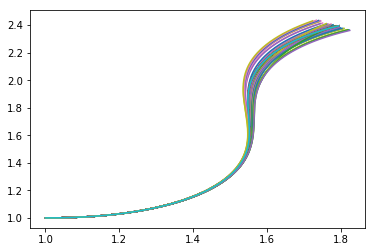

Gen 6 : Fit =  0.00013983182986214516


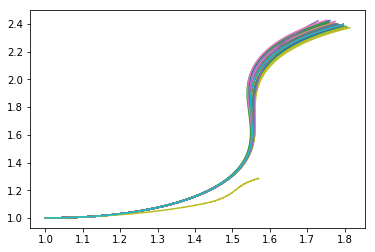

Gen 7 : Fit =  9.611757147943408e-05


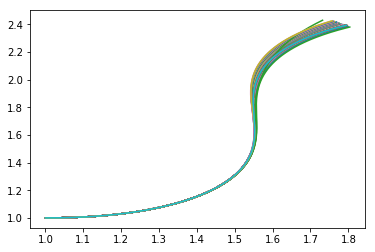

Gen 8 : Fit =  7.38204395484075e-05


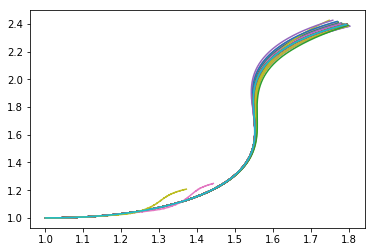

Gen 9 : Fit =  6.794663889722536e-05


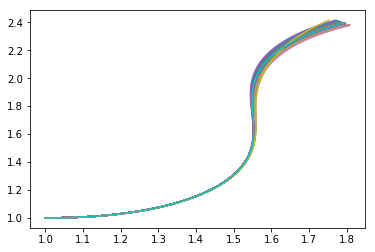

Gen 10 : Fit =  5.4499962016497504e-05


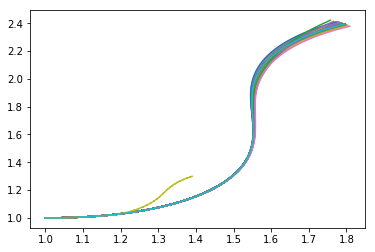

Gen 11 : Fit =  5.1726231842763445e-05


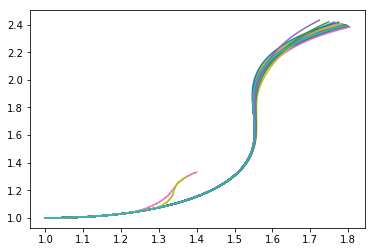

Gen 12 : Fit =  4.033654497508034e-05


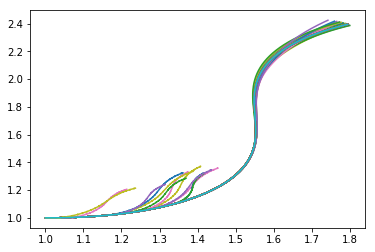

Gen 13 : Fit =  3.91623062593557e-05


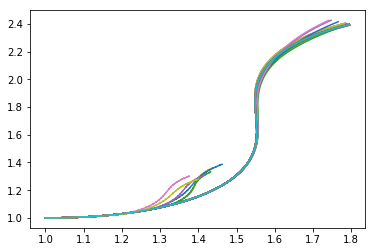

Gen 14 : Fit =  3.622876241896291e-05


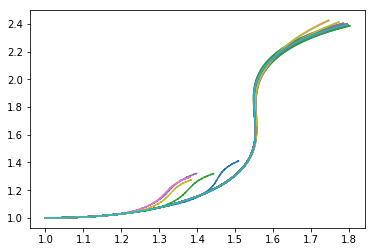

Gen 15 : Fit =  3.622876241896291e-05


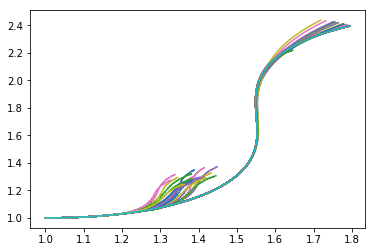

Gen 16 : Fit =  3.622876241896291e-05


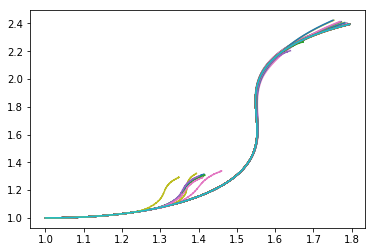

Gen 17 : Fit =  3.622876241896291e-05


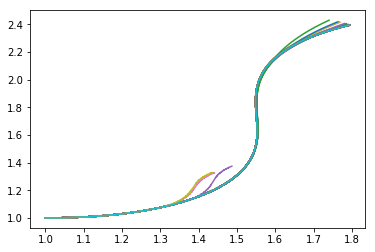

Gen 18 : Fit =  3.622876241896291e-05


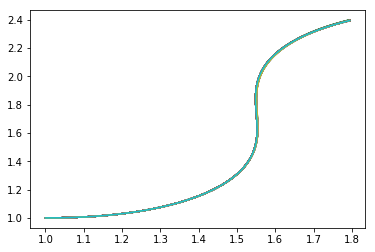

Gen 19 : Fit =  3.622876241896291e-05


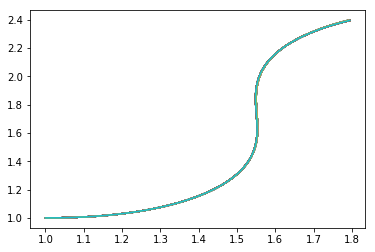

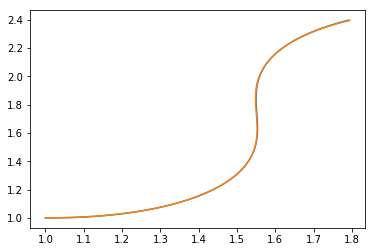

[-5.00000000e+03 -5.00000000e+03 -2.07243238e+00 -2.19996077e-01
 -1.80000000e+00  0.00000000e+00  1.87672011e+00  1.15838535e-02
  3.43555519e+00  5.00000000e+03  5.00000000e+03 -5.00000000e+03
 -5.00000000e+03 -3.13864860e+00 -1.80299124e-01 -1.80000000e+00
  0.00000000e+00  1.87898264e+00  6.07319261e-02  2.78573442e+00
  5.00000000e+03  5.00000000e+03 -5.00000000e+02  0.00000000e+00
  5.00000000e+02 -5.00000000e+02  0.00000000e+00  5.00000000e+02
  3.62287624e-05]


In [4]:
import random as r

inf = 5000
amin = [-inf,-inf,-15,-1.5,-5,0,1.8,0.01,2,inf,inf,-inf,-inf,-15,-1.5,-5,0,1.8,0.01,2,inf,inf,-500,0,500,-500,-0,500]
amax = [-inf,-inf,-2,-0.01,-1.8,0,5,1.5,15,inf,inf,-inf,-inf,-2,-0.01,-1.8,0,5,1.5,15,inf,inf,-500,0,500,-500,0,500]


def calFitness(agent):
    return agent[aSize-1]

def recalFitness(agent):
    agent[aSize-1] = fitness(agent)
    return agent[aSize-1]

def normalize(agent):
    for i in range(0,aSize-1):
        agent[i] = amin[i] if agent[i] < amin[i] else (amax[i] if agent[i] > amax[i] else agent[i])
    return agent

def printPop(pop):
    for i in range(0,popSize):
        print(calFitness(pop[i]))
    print('\n')
    

popSize =50
generation = 20

aSize = len(amin) + 1
a = 2
A = np.zeros(3)
C = np.zeros(3)

pop = []
alpha = beta = delta = np.zeros(aSize)

for i in range(0,popSize):
    agent = np.zeros(aSize)
    for j in range(0,aSize-1):
        agent[j]=r.uniform(amin[j],amax[j])
    agent[aSize-1] = fitness(agent)
    pop.append(agent)

#for i in range(0,popSize): fitness(pop[i], True) 
pop.sort(key=calFitness)
alpha = pop[0]
beta = pop[1]
delta = pop[2]

print("Init: Fit = ", calFitness(pop[0]))
#printPop()
for ite in range(0,generation):
    a = 2 - 2*ite/(generation-1)
    
    for i in range(3,popSize):
        for j in range(0,3):
            A[j] = 2*a*r.uniform(0,1) - a
            C[j] = 2*r.uniform(0,1)
        Dalpha = np.abs(C[0]*alpha - pop[i])
        x1 = alpha - A[0]*Dalpha
        Dbeta = np.abs(C[1]*beta - pop[i])
        x2 = beta - A[1]*Dbeta
        Ddelta = np.abs(C[2]*delta - pop[i])
        x3 = delta - A[2]*Ddelta
        pop[i] = (x1+x2+x3)/3
        pop[i] = normalize(pop[i])
        pop[i][aSize-1] = recalFitness(pop[i])
    
    pop.sort(key=calFitness)
    alpha = pop[0]
    beta = pop[1]
    delta = pop[2]
    
    print("Gen",ite,": Fit = ", calFitness(pop[0]))
    
    for i in range(0,popSize): fitness(pop[i], True) 
    plt.show()
    #printPop()
    #conver = 0.0
    #for i in range(1,popSize):
    #   conver+=calFitness(pop[i]) - calFitness(pop[0])
    #print('\t Converge degree: ',conver)

for i in range(0,1): fitness(pop[i], True) 
plt.show()
print(pop[0])
#print(pop)